In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('911 calls- Mongomery county/911.csv')
df = df[df['zip'] > 10000]

In [4]:
# lat: Latitude
# lng: Longitude
# desc: Description of Emergency
# zip: ZIP Code
# title: Title of Emergency
# time: StampDate and time of the call
# twp: Town
# addr: Address

In [5]:
print (df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
5  19446.0         EMS: HEAD INJURY  2015-12-10 15:39:04           LANSDALE   

                         addr  e  
0      REINDEER CT & 

In [6]:
df.columns = ['latitude','longitude','description','zip','type','time','town','address','if_emergency']

In [7]:
df.dtypes

latitude        float64
longitude       float64
description      object
zip             float64
type             object
time             object
town             object
address          object
if_emergency      int64
dtype: object

In [8]:
df['time'] = pd.to_datetime(df['time'])
print (df['time'].max())
print (df['time'].min())
print (df['time'].max() - df['time'].min())

2018-03-24 13:15:39
2015-12-10 14:39:21
834 days 22:36:18


In [9]:
df.count()

latitude        286832
longitude       286832
description     286832
zip             286832
type            286832
time            286832
town            286783
address         286832
if_emergency    286832
dtype: int64

In [10]:
df.head()

,latitude,longitude,description,zip,type,time,town,address,if_emergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


In [11]:
## Categorizing data by emergency type
df_title_cat = pd.DataFrame(df.type.str.split(':',1).tolist(),columns = ['emergency_type','emergency_subtype'])
df_cat = df.copy()
del df_cat['type']
df_cat.insert(4,'emergency_type',df_title_cat['emergency_type'].values)
df_cat.insert(5,'emergency_subtype',df_title_cat['emergency_subtype'].values)

In [12]:
df_cat.head()

,latitude,longitude,description,zip,emergency_type,emergency_subtype,time,town,address,if_emergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS,HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


## Clustering

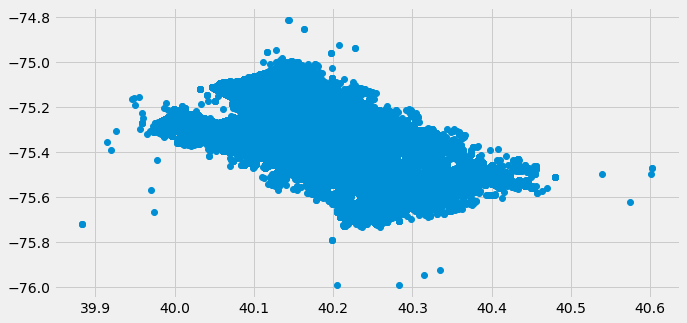

In [13]:
plt.plot(df_cat.latitude[(df_cat.latitude>39.8) & (df_cat.latitude<40.8)],df_cat.longitude[(df_cat.latitude>39.8) & (df_cat.latitude<40.8)],'o')


In [14]:
only_ems = df_cat[df_cat.emergency_type=='EMS']
unscaled_ems = pd.DataFrame()
unscaled_ems['latitude'] = only_ems.latitude[(only_ems.latitude>39.8) & (only_ems.latitude<40.8)]
unscaled_ems['longitude'] = only_ems.longitude[(only_ems.latitude>39.8) & (only_ems.latitude<40.8)]

In [15]:
track_location = pd.DataFrame()
max_lat = max(unscaled_ems['latitude'])
min_lat = min(unscaled_ems['latitude'])
max_long = max(unscaled_ems['longitude'])
min_long = min(unscaled_ems['longitude'])

track_location['scaled_lat'] = (unscaled_ems['latitude']-min_lat)/(max_lat-min_lat)
track_location['scaled_long'] = (unscaled_ems['longitude']-min_long)/(max_long-min_long)

In [16]:
track_location.head()

,scaled_lat,scaled_long
0,0.528666,0.307714
1,0.466926,0.593254
3,0.246871,0.522158
5,0.459811,0.576511
6,0.349151,0.716704


In [18]:
from sklearn.cluster import KMeans
n_clusters=97
clusters = KMeans(n_clusters=n_clusters)
clusters.fit(track_location.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=97, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
track_location['cluster'] = clusters.labels_

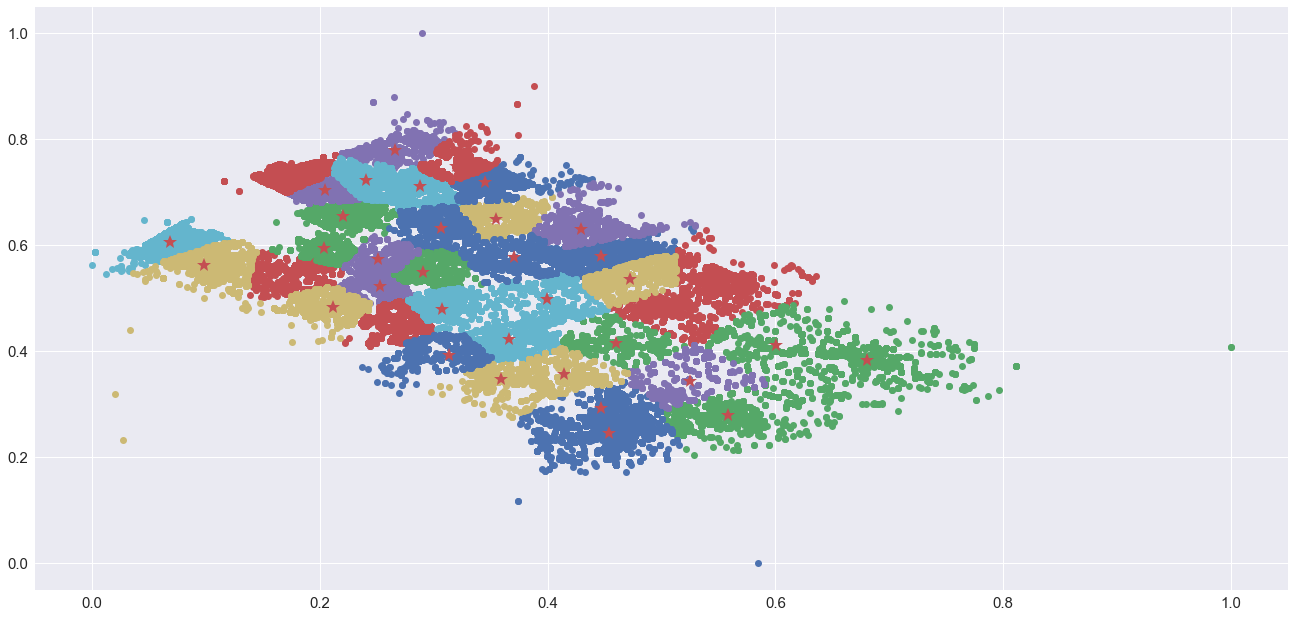

In [38]:
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(20,10))
for i in range(n_clusters):
    plt.plot(track_location.scaled_lat[track_location.cluster==i],track_location.scaled_long[track_location.cluster==i],'o')
plt.plot(clusters.cluster_centers_[:,0],clusters.cluster_centers_[:,1],'*',markersize=15)
plt.show()
plt.close()

In [39]:
clusters.inertia_

80.03625207167168

In [40]:
stations_file = open('Fire_and_Rescue_Stations_MD.csv','r').read()
stations_file = stations_file.split('\n')

In [41]:
location_data = []
for element in stations_file:
    if len(element)>0:
        location_data.append(element.split(',')[1:])

In [42]:
location_data = np.array(location_data).astype(np.float)

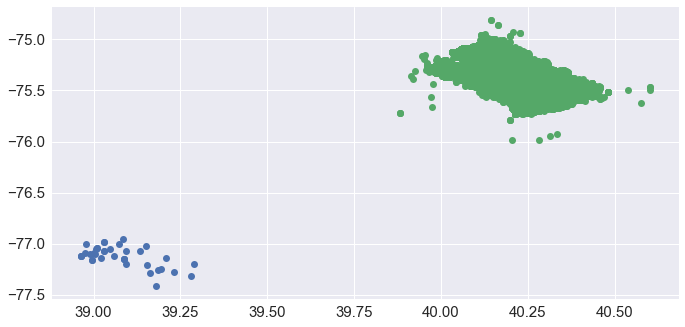

In [43]:
plt.plot(location_data[:,0],location_data[:,1],'o')
plt.plot(df_cat.latitude[(df_cat.latitude>39.8) & (df_cat.latitude<40.8)],df_cat.longitude[(df_cat.latitude>39.8) & (df_cat.latitude<40.8)],'o')
